In [170]:
"""
Universidad Autónoma de Chihuahua
Machine Learning
Proyecto Iris
Gael Aristides Hinojos Ramírez
"""

'\nUniversidad Autónoma de Chihuahua\nMachine Learning\nProyecto Iris\nGael Aristides Hinojos Ramírez\n'

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [172]:
#Se baja la base de datos y se hace una descripcion corta de ellos
iris = pd.read_csv('Iris.csv')
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [173]:
#Se elimina la columan de ID
iris = iris.drop('Id', axis=1)

In [174]:
#Se realiza un split de los datos, quitando la columna de Species de X_train
X_train, X_test, y_train, y_test = train_test_split(iris, iris['Species'], random_state=12, test_size=0.2)
print(X_train.shape)
rain_data = X_train.drop('Species', axis=1).copy()

(120, 5)


In [175]:
#Se crea el pipeline que estandarizara los datos, para luego usarlo para estandarizar los datos de entrenamiento
pipeline = Pipeline([
    ('scaler', StandardScaler())
])

rain_data = pipeline.fit_transform(rain_data)

In [176]:
#Se utiliza un label encoder para transformar las clases en un valor numerico
y_train_number = y_train.copy()
print(y_train_number)
label_encoder = LabelEncoder()
y_train_number = label_encoder.fit_transform(y_train_number)
print(y_train_number)

17         Iris-setosa
81     Iris-versicolor
103     Iris-virginica
33         Iris-setosa
101     Iris-virginica
            ...       
76     Iris-versicolor
3          Iris-setosa
130     Iris-virginica
134     Iris-virginica
75     Iris-versicolor
Name: Species, Length: 120, dtype: object
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]


In [177]:
#Se crea la variable X_plot para poder realizar un scatter plot
X_plot = X_train.copy()
X_plot['Species'] = label_encoder.fit_transform(X_plot['Species'])

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

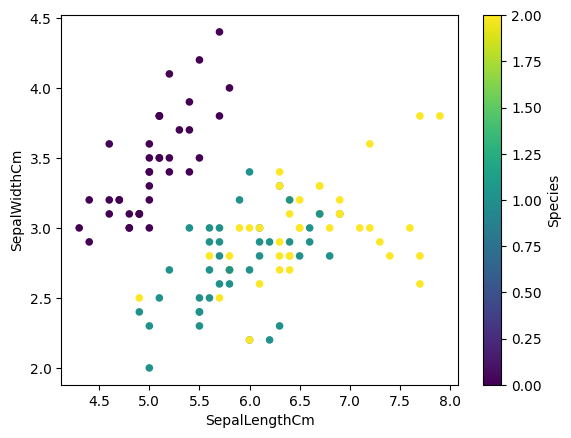

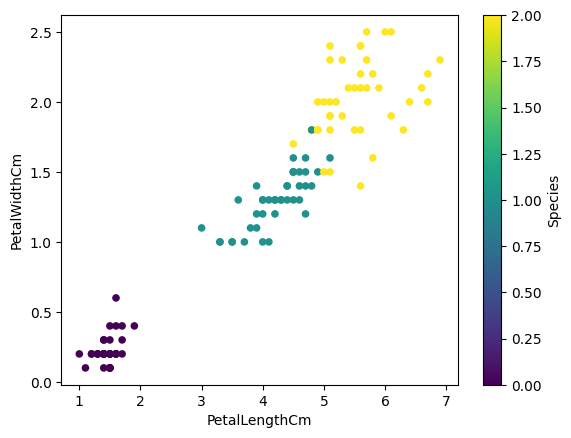

In [178]:
#Se realiza un scatter plot de los datos
X_plot.plot.scatter('SepalLengthCm', 'SepalWidthCm', c='Species', colormap='viridis')
X_plot.plot.scatter('PetalLengthCm', 'PetalWidthCm', c='Species', colormap='viridis')

In [179]:
#Se inicializa el modelo de regresion logistica
log_reg = LogisticRegression()

In [180]:
#Se utiliza el metodo de Grid Search para buscar los mejores parametros para el modelo
param_grid = [
    {'solver': ['lbfgs', 'newton-cg', 'sag'], 'penalty': ['l2', None], 'fit_intercept': [True, False], 
     'max_iter': [50, 100, 150], 'warm_start': [True, False]},
    {'solver': ['saga'], 'penalty': ['elasticnet', 'l1', 'l2', None], 'fit_intercept': [True, False], 
     'max_iter': [50, 100, 150], 'warm_start': [True, False], 'l1_ratio': [0.25, 0.5, 0.75]}
]

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(rain_data, y_train_number)

print('Best Parameters: ', grid_search.best_params_)
print('Best Estimator: ', grid_search.best_estimator_)
print('Best Score: ', grid_search.best_score_)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

Best Parameters:  {'fit_intercept': True, 'max_iter': 50, 'penalty': None, 'solver': 'sag', 'warm_start': True}
Best Estimator:  LogisticRegression(max_iter=50, penalty=None, solver='sag', warm_start=True)
Best Score:  0.975


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

In [181]:
#Se asigna a esta variable el modelo de regresion con los mejores parametros
final_log_reg = grid_search.best_estimator_

In [182]:
#Se transforman los labels con el label encoder y se estandarizan los datos, ambos de la particion de test
y_test_number = y_test.copy()
label_encoder = LabelEncoder()
y_test_number = label_encoder.fit_transform(y_test_number)

X_test = pipeline.fit_transform(X_test.drop('Species', axis=1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.92      0.96        12
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.89        30
   weighted avg       0.91      0.90      0.90        30

Accuracy:  0.9


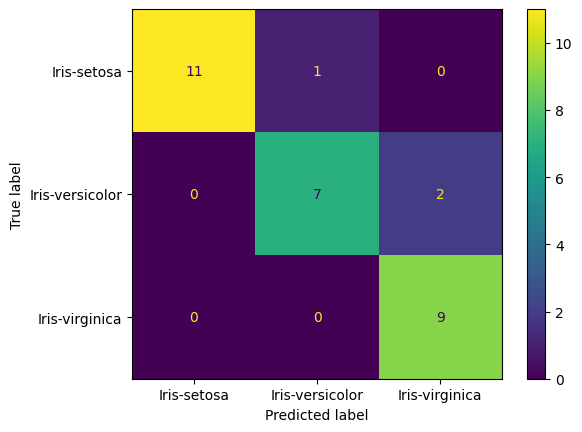

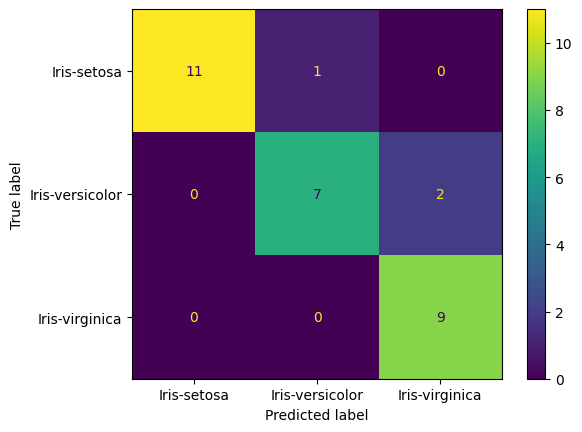

In [183]:
#Se realizan las predicciones y, en base a ellas, se realiza un clasification report, se calcula accuracy
#y se crea un confusion matrix
#La razon por la que hubo errores fue porque no hay tanta diferenciacion entre las clases al mirar los datos
#Probablemente sean necesarios mas features para mejorar la el desempeño de clasificacion
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
test_pred = final_log_reg.predict(X_test)
print(classification_report(y_test_number, test_pred, target_names=target_names))
print('Accuracy: ', accuracy_score(y_test_number, test_pred))
disp = ConfusionMatrixDisplay.from_predictions(y_test_number, test_pred, display_labels=target_names)
disp.plot()

In [184]:
#Se guarda el pipeline y el modelo entrenado en archivos sav
import joblib
joblib.dump(final_log_reg, 'logistic_regression.sav')
joblib.dump(pipeline, 'pipeline.sav')

['pipeline.sav']